In [2]:
from fastai import *
from fastai.vision import *
from fastai.imports import *


In [3]:
folder = 'dejan_stankovic'
file = 'urls_dejanstankovic.txt'


In [6]:
folder = 'vladan_milojevic'
file = 'urls_vladanmilojevic.txt'



In [9]:
folder = 'zvezdan_terzic'
file = 'urls_zvezdanterzic.txt'



In [10]:
path = Path('Data/Slike')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


In [42]:
path.ls()


[WindowsPath('Data/Slike/dejan_stankovic'),
 WindowsPath('Data/Slike/vladan_milojevic'),
 WindowsPath('Data/Slike/zvezdan_terzic')]

In [12]:
## Download images
classes = ['dejan_stankovic','vladan_milojevic','zvezdan_terzic']



In [11]:
# If you have problems download, try with `max_workers=0` to see exceptions:
download_images(path/file, dest, max_pics=400, max_workers=0)



In [ ]:
'''Then we can remove any images that can't be opened:
'''

In [13]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)



dejan_stankovic
vladan_milojevic
zvezdan_terzic


In [45]:
## View data



In [46]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)



In [47]:
data.classes


['dejan_stankovic', 'vladan_milojevic', 'zvezdan_terzic']

In [52]:
'''Good! Let's take a look at some of our pictures then.
'''


"Good! Let's take a look at some of our pictures then.\n"

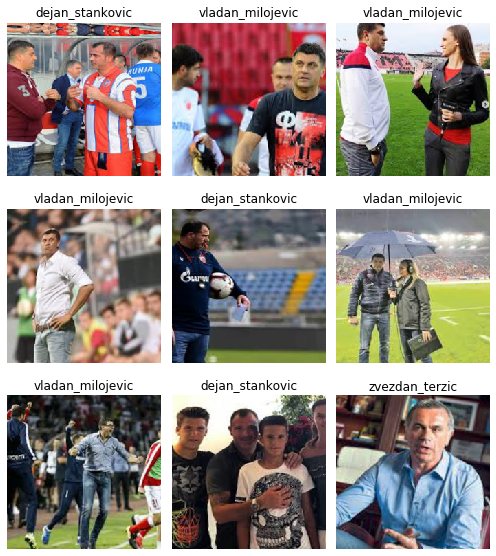

In [49]:
data.show_batch(rows=3, figsize=(7,8))


In [50]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)



(['dejan_stankovic', 'vladan_milojevic', 'zvezdan_terzic'], 3, 192, 48)

In [53]:
'''## Train model
'''


'## Train model\n'

In [54]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)



Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\Dejan/.cache\torch\checkpoints\resnet34-333f7ec4.pth


In [55]:
learn.fit_one_cycle(4)



In [56]:
learn.save('stage-1')



In [57]:
learn.unfreeze()



In [58]:
learn.lr_find()



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


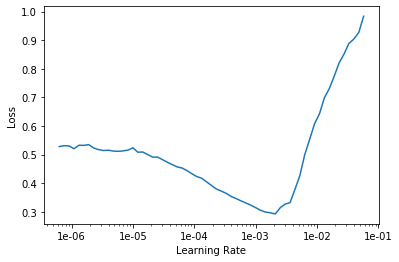

In [59]:
'''# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)'''

learn.recorder.plot()



In [60]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))



In [61]:
learn.save('stage-2')



In [62]:
'''## Interpretation
'''


'## Interpretation\n'

In [63]:
learn.load('stage-2');



In [64]:
interp = ClassificationInterpretation.from_learner(learn)



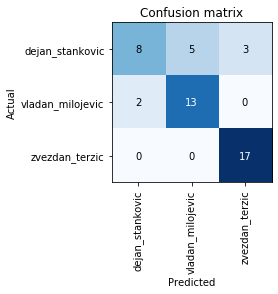

In [65]:
interp.plot_confusion_matrix()



In [ ]:
'''## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.


'''

In [66]:
from fastai.widgets import *



In [78]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch())



In [80]:
'''Then we create a new learner to use our new databunch with all the images.
'''


'Then we create a new learner to use our new databunch with all the images.\n'

'Then we create a new learner to use our new databunch with all the images.\n'

In [81]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [82]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)



In [83]:
'''Make sure you're running this notebook in Jupyter Notebook, not Jupyter Lab. That is accessible via [/tree](/tree), not [/lab](/lab). Running the `ImageCleaner` widget in Jupyter Lab is [not currently supported](https://github.com/fastai/fastai/issues/1539).
'''


"Make sure you're running this notebook in Jupyter Notebook, not Jupyter Lab. That is accessible via [/tree](/tree), not [/lab](/lab). Running the `ImageCleaner` widget in Jupyter Lab is [not currently supported](https://github.com/fastai/fastai/issues/1539).\n"

In [86]:
'''# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.'''
ImageCleaner(ds, idxs, path)



Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [87]:
'''## Putting your model in production
'''


'## Putting your model in production\n'

In [88]:
'''First thing first, let's export the content of our `Learner` object for production:
'''
learn.export()


In [ ]:
'''This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).
You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:
'''


In [89]:
data.classes


['dejan_stankovic', 'vladan_milojevic', 'zvezdan_terzic']

In [90]:
defaults.device = torch.device('cpu')



"We create our `Learner` in production enviromnent like this, just make sure that `path` contains the file 'export.pkl' from before.\n"

WindowsPath('Data/Slike')

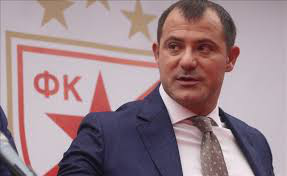

In [94]:
img = open_image(path/'dejan_stankovic'/'dejan_stankovic'/'00000021.jpg')
img



In [105]:
'''We create our `Learner` in production enviromnent like this, just make sure that `path` contains the file 'export.pkl' from before.
'''

"We create our `Learner` in production enviromnent like this, just make sure that `path` contains the file 'export.pkl' from before.\n"

In [111]:
classes = ['dejan_stankovic','vladan_milojevic','zvezdan_terzic']
data2 = ImageDataBunch.single_from_classes(path, classes, size=224).normalize(imagenet_stats)
learn = cnn_learner(data2, models.resnet34)
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: Data\Slike;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: Data\Slike;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): Ba

In [112]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class



Category tensor(0)

In [77]:
'''
So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)
'''

